In [3]:
# Para cargue de datos desde el directorio local
from google.colab import files
uploaded = files.upload()


Saving ventas-por-factura.csv to ventas-por-factura.csv


In [66]:
# Validamos el cargue
for filename in uploaded.keys():
    print(f"Archivo subido: {filename}")

Archivo subido: ventas-por-factura.csv


In [67]:
# Generamos el dataframe y lo visualizamos
import pandas as pd
import numpy as np
ventas_cliente = list(uploaded.keys())[0]
df = pd.read_csv(ventas_cliente)
print(df.head())

  N° de factura     Fecha de factura  ID Cliente            País  Cantidad  \
0        548370   3/30/2021 16:14:00     15528.0  United Kingdom       123   
1        575767  11/11/2021 11:11:00     17348.0  United Kingdom       163   
2       C570727  10/12/2021 11:32:00     12471.0         Germany        -1   
3        549106    4/6/2021 12:08:00     17045.0  United Kingdom         1   
4        573112  10/27/2021 15:33:00     16416.0  United Kingdom       357   

    Monto  
0  229,33  
1  209,73  
2   -1,45  
3   39,95  
4  344,83  


In [68]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [69]:
df.tail()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"
25952,537999,12/9/2020 11:44:00,NaN,United Kingdom,-223,"0,00"


In [70]:
# Validamos el tamaño del dataframe
num_rows, num_cols = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

Número de filas: 25953
Número de columnas: 6


In [71]:
# Redefinimos nombre de las columnas para que queden en un lenguaje mas simple
df.columns = ["Invoice_ID","Invoice_Date", "Customer_ID","Country","Quantity","Amount"]
df.head()

,Invoice_ID,Invoice_Date,Customer_ID,Country,Quantity,Amount
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [72]:
# Visualizamos el tipo de dato de cada atributo
print(df.dtypes)

Invoice_ID       object
Invoice_Date     object
Customer_ID     float64
Country          object
Quantity          int64
Amount           object
dtype: object


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice_ID    25953 non-null  object 
 1   Invoice_Date  25953 non-null  object 
 2   Customer_ID   22229 non-null  float64
 3   Country       25953 non-null  object 
 4   Quantity      25953 non-null  int64  
 5   Amount        25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [74]:
# Redefiniendo el formato de la columna monto y conviertiendo el tipo de dato
df["Amount"] = df["Amount"].str.replace(",",".").astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice_ID    25953 non-null  object 
 1   Invoice_Date  25953 non-null  object 
 2   Customer_ID   22229 non-null  float64
 3   Country       25953 non-null  object 
 4   Quantity      25953 non-null  int64  
 5   Amount        25953 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [75]:
df.describe()

,Customer_ID,Quantity,Amount
count,22229.000000,25953.000000,25953.000000
mean,15238.289892,199.474049,375.657552
std,1732.981685,1107.075809,2009.042459
min,12346.000000,-80995.000000,-168469.600000
25%,13755.000000,6.000000,11.550000
50%,15136.000000,100.000000,207.050000
75%,16746.000000,240.000000,408.660000
max,18287.000000,80995.000000,168469.600000


In [76]:
df.describe(include = "all")

,Invoice_ID,Invoice_Date,Customer_ID,Country,Quantity,Amount
count,25953,25953,22229.000000,25953,25953.000000,25953.000000
unique,25900,23260,NaN,38,NaN,NaN
top,550333,5/10/2021 15:05:00,NaN,United Kingdom,NaN,NaN
freq,2,6,NaN,23542,NaN,NaN
mean,NaN,NaN,15238.289892,NaN,199.474049,375.657552
std,NaN,NaN,1732.981685,NaN,1107.075809,2009.042459
min,NaN,NaN,12346.000000,NaN,-80995.000000,-168469.600000
25%,NaN,NaN,13755.000000,NaN,6.000000,11.550000
50%,NaN,NaN,15136.000000,NaN,100.000000,207.050000
75%,NaN,NaN,16746.000000,NaN,240.000000,408.660000


In [77]:
# Identificación de los datos nulos y eliminamos las filas que los contengan
df.isnull().sum()

,0
Invoice_ID,0
Invoice_Date,0
Customer_ID,3724
Country,0
Quantity,0
Amount,0


In [78]:
df=df.dropna()
df.isnull().sum()

,0
Invoice_ID,0
Invoice_Date,0
Customer_ID,0
Country,0
Quantity,0
Amount,0


In [79]:
df.describe()

,Customer_ID,Quantity,Amount
count,22229.000000,22229.000000,22229.000000
mean,15238.289892,220.766026,373.465218
std,1732.981685,1169.102426,2016.647262
min,12346.000000,-80995.000000,-168469.600000
25%,13755.000000,30.000000,87.300000
50%,15136.000000,120.000000,240.680000
75%,16746.000000,254.000000,417.690000
max,18287.000000,80995.000000,168469.600000


In [89]:
df.describe(include = "all")

,Invoice_ID,Invoice_Date,Customer_ID,Country,Quantity,Amount
count,22229,22229,22229.000000,22229,22229.000000,22229.000000
unique,22190,20460,NaN,37,NaN,NaN
top,541849,12/6/2021 11:05:00,NaN,United Kingdom,NaN,NaN
freq,2,4,NaN,19891,NaN,NaN
mean,NaN,NaN,15238.289892,NaN,220.766026,373.465218
std,NaN,NaN,1732.981685,NaN,1169.102426,2016.647262
min,NaN,NaN,12346.000000,NaN,-80995.000000,-168469.600000
25%,NaN,NaN,13755.000000,NaN,30.000000,87.300000
50%,NaN,NaN,15136.000000,NaN,120.000000,240.680000
75%,NaN,NaN,16746.000000,NaN,254.000000,417.690000


In [95]:
df_grouped = df.groupby('Country')['Amount'].sum().reset_index()
print(df_grouped)

                 Country      Amount
0              Australia   137077.27
1                Austria    10154.32
2                Bahrain      548.40
3                Belgium    40910.96
4                 Brazil     1143.60
5                 Canada     3666.38
6        Channel Islands    20082.04
7                 Cyprus    12946.29
8         Czech Republic      707.72
9                Denmark    18768.14
10                  EIRE   251061.52
11    European Community     1291.75
12               Finland    22326.74
13                France   196712.84
14               Germany   221698.21
15                Greece     4710.52
16               Iceland     4310.00
17                Israel     6994.25
18                 Italy    16890.51
19                 Japan    35340.62
20               Lebanon     1693.88
21             Lithuania     1661.06
22                 Malta     2505.47
23           Netherlands   284661.54
24                Norway    35163.46
25                Poland     7213.14
2

In [80]:
pip install seaborn

<ipython-input-96-95344dfb53f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y='Amount', palette='viridis')


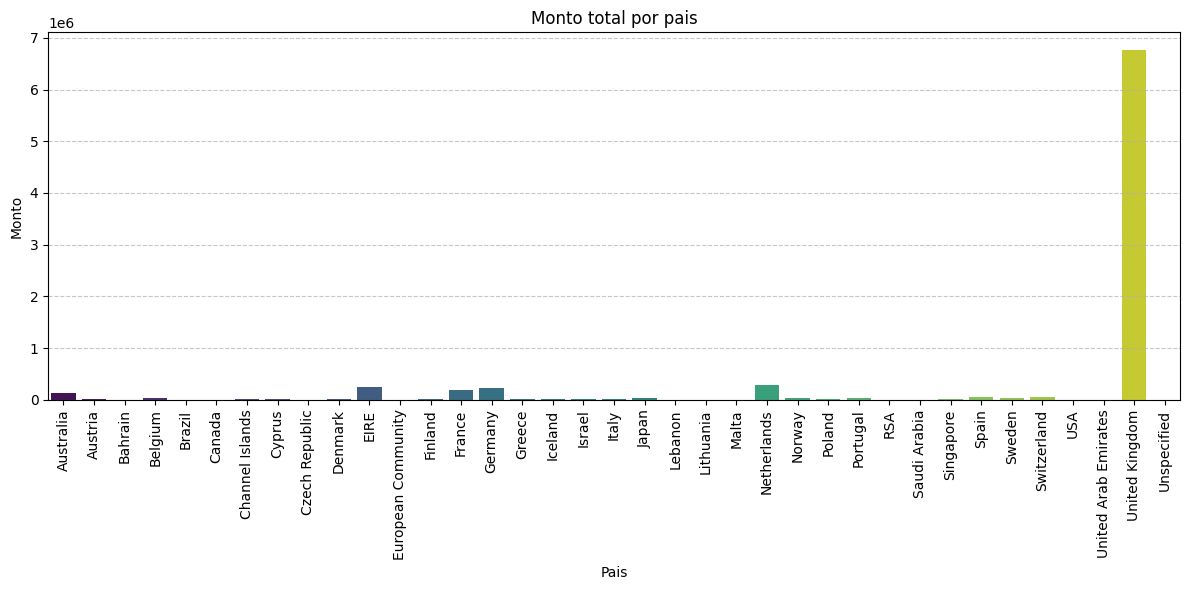

In [96]:
# Crear el gráfico de tendencia usando Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Country', y='Amount', palette='viridis')

# Añadir título y etiquetas
plt.title('Monto total por pais')
plt.xlabel('Pais')
plt.ylabel('Monto')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Este data set contine las facturas de venta por cliente, país y monto. Para esta prática se analizó el monto por país centrandonos en las caracteristicas de la variable monto. Al hacer la exploración de datos inicial, se identificaron 25.953 lineas de datos, sin embargo esta exploración también nos indico que existen 3724 lineas de datos nulos, sin información en en ID del cliente, por lo que se procedio a eliminar estas filas con datos nulos, ya que sin este dato no hay garantía que los demás campos sean correctos.
Una vez ejecutada esta limpieza, se ejecutan de nuevo los analisis de variables y se identifican 22.229 datos en los que la moda es Reino Unido con 19891 compras, adicional se tienen 37 datos unicos que nos indican que en 37 paises solo se ha realizado una compra.